In [178]:
import numpy as np
from scipy.integrate import ode

radius = 2
size = 10
gridlines = 10
resolution = 20
timeend = 10

def schwarzschild(t, x):
    return [
        x[2],
        x[3],
        radius * x[2]**2 / (2*x[0]*(x[0] - radius)) - radius * (x[0] - radius)* x[3]**2 / ( 2*x[0]**3),
        -radius * x[2] * x[3] / ( 2*x[0]*(x[0] - radius)),
    ]

x0 = [5, 0.01, 0.01, 1]

solver = ode(schwarzschild)


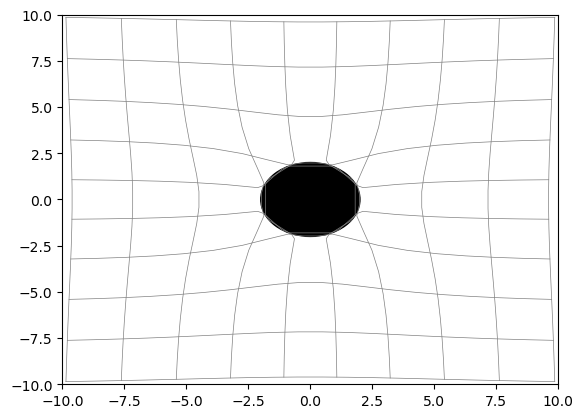

In [179]:
import matplotlib.pyplot as plt
plt.xlim(-size, size)
plt.ylim(-size, size)


lines = []
for x in np.linspace(-size, size, gridlines):
    line = []
    for y in np.linspace(-size, size, resolution):
        point = [np.sqrt(x*x + y*y),0.001, 0.001, 1]
        solver.set_initial_value(point, 0)
        solution = solver.integrate(timeend)
        line.append([solution[0]*np.cos(np.arctan2(y,x)), solution[0]*np.sin(np.arctan2(y,x))])
    lines.append(line)
for y in np.linspace(-size, size, gridlines):
    line = []
    for x in np.linspace(-size, size, resolution):
        point = [np.sqrt(x*x + y*y),0.001, 0.001, 1]
        solver.set_initial_value(point, 0)
        solution = solver.integrate(timeend)
        line.append([solution[0]*np.cos(np.arctan2(y,x)), solution[0]*np.sin(np.arctan2(y,x))])
    lines.append(line)

for line in lines:
    plt.plot([point[0] for point in line], [point[1] for point in line], color='grey', markersize=1, linestyle='-', linewidth=0.5)


circle = plt.Circle((0, 0), radius, color='black')
plt.gca().add_patch(circle) 
plt.show()